In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns





diamound = pd.read_csv('DiamondPricePrediction.csv')
diamound.columns
diamound.describe()
#diamound['Color'].unique()
#diamound['Clarity'].unique()
#diamound['Cut(Quality)'].unique()

#diamound.hist(bins=50,figsize=(20,15))
#plt.show()

train_set, test_set = train_test_split(diamound, test_size=0.2, random_state = 42) 
#train_set.shape
train_set.head()


,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
26546,2.01,Good,F,SI2,58.1,64.0,16231,8.23,8.19,4.77
9159,1.01,Very Good,E,SI2,60.0,60.0,4540,6.57,6.49,3.92
14131,1.10,Premium,H,VS2,62.5,58.0,5729,6.59,6.54,4.10
15757,1.50,Good,E,SI2,61.5,65.0,6300,7.21,7.17,4.42
24632,1.52,Very Good,G,VS1,62.1,57.0,12968,7.27,7.32,4.53


In [134]:
diamound.shape

(53940, 10)

In [87]:
#diamound['Color'].unique()
diamound.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Carat(Weight of Daimond)  53940 non-null  float64
 1   Cut(Quality)              53940 non-null  object 
 2   Color                     53940 non-null  object 
 3   Clarity                   53940 non-null  object 
 4   Depth                     53940 non-null  float64
 5   Table                     53940 non-null  float64
 6   Price(in US dollars)      53940 non-null  int64  
 7   X(length)                 53940 non-null  float64
 8   Y(width)                  53940 non-null  float64
 9   Z(Depth)                  53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


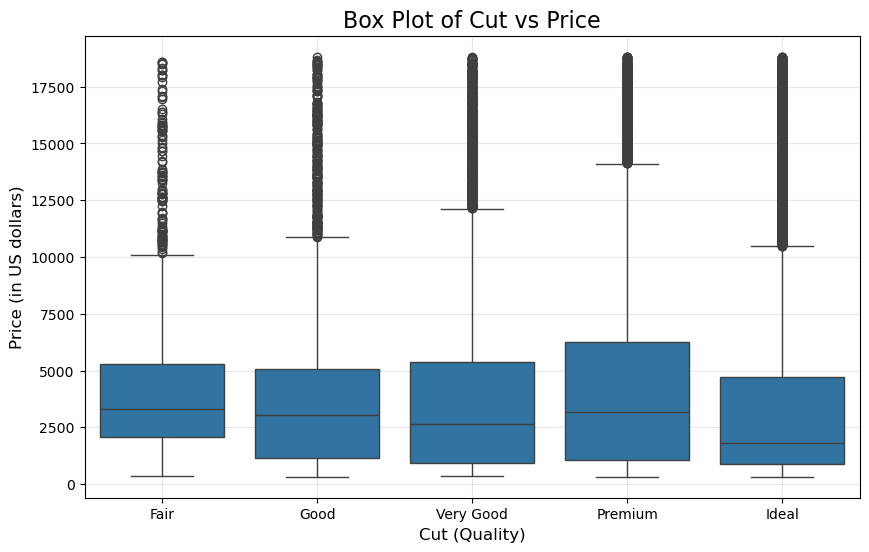

In [88]:
tr_data = train_set.copy()

plt.figure(figsize=(10, 6))
sns.boxplot(x="Cut(Quality)", y="Price(in US dollars)", data=tr_data, order=["Fair", "Good", "Very Good", "Premium", "Ideal"])
plt.title("Box Plot of Cut vs Price", fontsize=16)
plt.xlabel("Cut (Quality)", fontsize=12)
plt.ylabel("Price (in US dollars)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

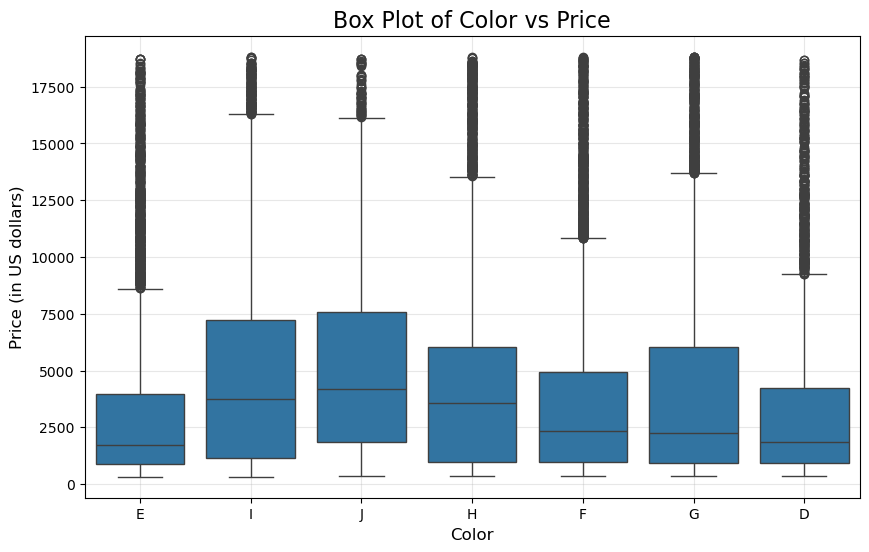

In [89]:
tr_data = train_set.copy()

plt.figure(figsize=(10, 6))
sns.boxplot(x="Color", y="Price(in US dollars)", data=tr_data, order=['E', 'I', 'J', 'H', 'F', 'G', 'D'])
plt.title("Box Plot of Color vs Price", fontsize=16)
plt.xlabel("Color", fontsize=12)
plt.ylabel("Price (in US dollars)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

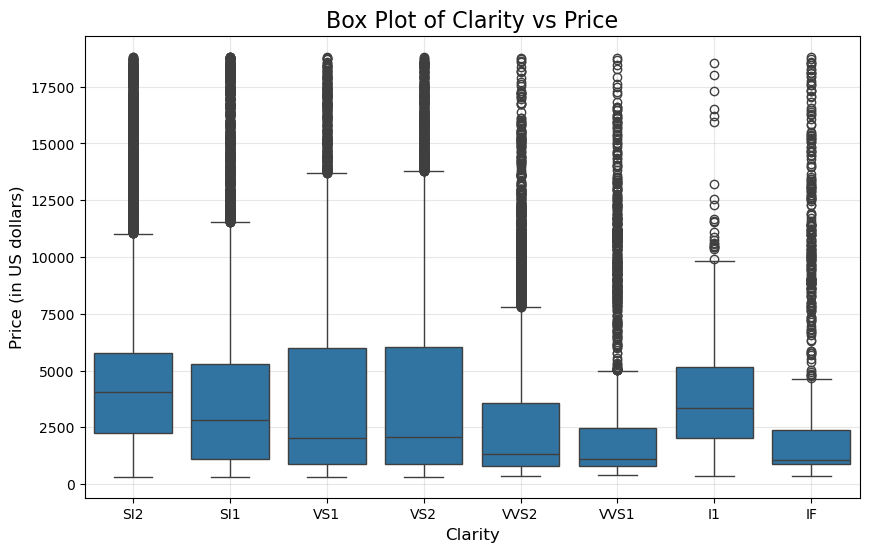

In [90]:
tr_data = train_set.copy()

plt.figure(figsize=(10, 6))
sns.boxplot(x="Clarity", y="Price(in US dollars)", data=tr_data, order=['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'])
plt.title("Box Plot of Clarity vs Price", fontsize=16)
plt.xlabel("Clarity", fontsize=12)
plt.ylabel("Price (in US dollars)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

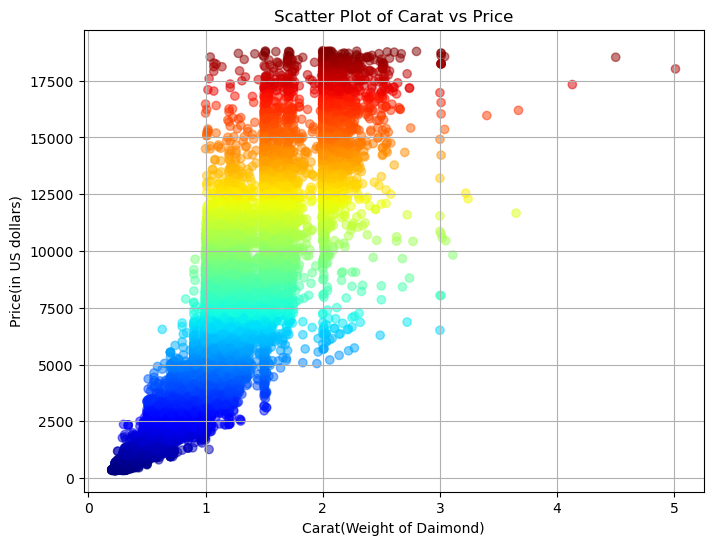

In [91]:
plt.figure(figsize=(8, 6))
plt.scatter(tr_data['Carat(Weight of Daimond)'], tr_data['Price(in US dollars)'] ,c=tr_data["Price(in US dollars)"], cmap=plt.get_cmap("jet"), alpha=0.5)
plt.xlabel('Carat(Weight of Daimond)')
plt.ylabel('Price(in US dollars)')
plt.title('Scatter Plot of Carat vs Price')
plt.grid(True)
plt.show()

In [92]:
# شناسایی ستون‌های غیر عددی
non_numeric_cols = tr_data.select_dtypes(include=['object']).columns

# گزینه 1: تبدیل ستون‌های غیر عددی به عددی
tr_data = pd.get_dummies(tr_data, columns=non_numeric_cols)

# محاسبه ماتریس همبستگی
corr_matrix = tr_data.corr()
print(corr_matrix["Price(in US dollars)"].sort_values(ascending=False))

Price(in US dollars)        1.000000
Carat(Weight of Daimond)    0.921641
X(length)                   0.884243
Y(width)                    0.860110
Z(Depth)                    0.856940
Clarity_SI2                 0.127901
Table                       0.123076
Color_I                     0.096628
Cut(Quality)_Premium        0.092281
Color_J                     0.076843
Color_H                     0.063423
Cut(Quality)_Fair           0.020846
Clarity_SI1                 0.011902
Color_G                     0.008033
Cut(Quality)_Very Good      0.006441
Cut(Quality)_Good           0.002080
Clarity_I1                 -0.001502
Clarity_VS2                -0.002933
Depth                      -0.005583
Clarity_VS1                -0.011343
Color_F                    -0.023552
Clarity_IF                 -0.048371
Clarity_VVS2               -0.051788
Color_D                    -0.071679
Clarity_VVS1               -0.094627
Cut(Quality)_Ideal         -0.096046
Color_E                    -0.102091
N

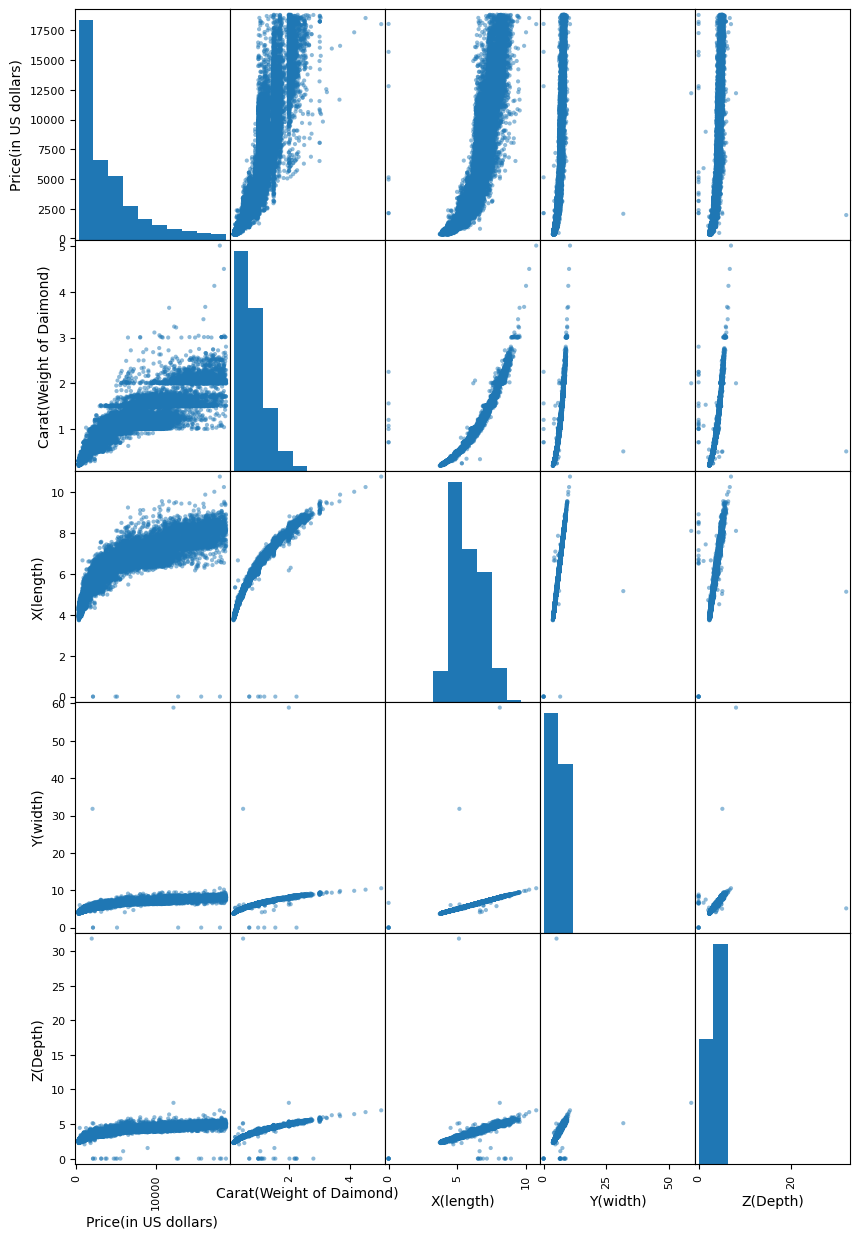

In [93]:
features=["Price(in US dollars)","Carat(Weight of Daimond)","X(length)","Y(width)","Z(Depth)"]
scatter_matrix(tr_data[features],figsize = (10,15))
plt.show() 

<Axes: xlabel='Carat(Weight of Daimond)', ylabel='Price(in US dollars)'>

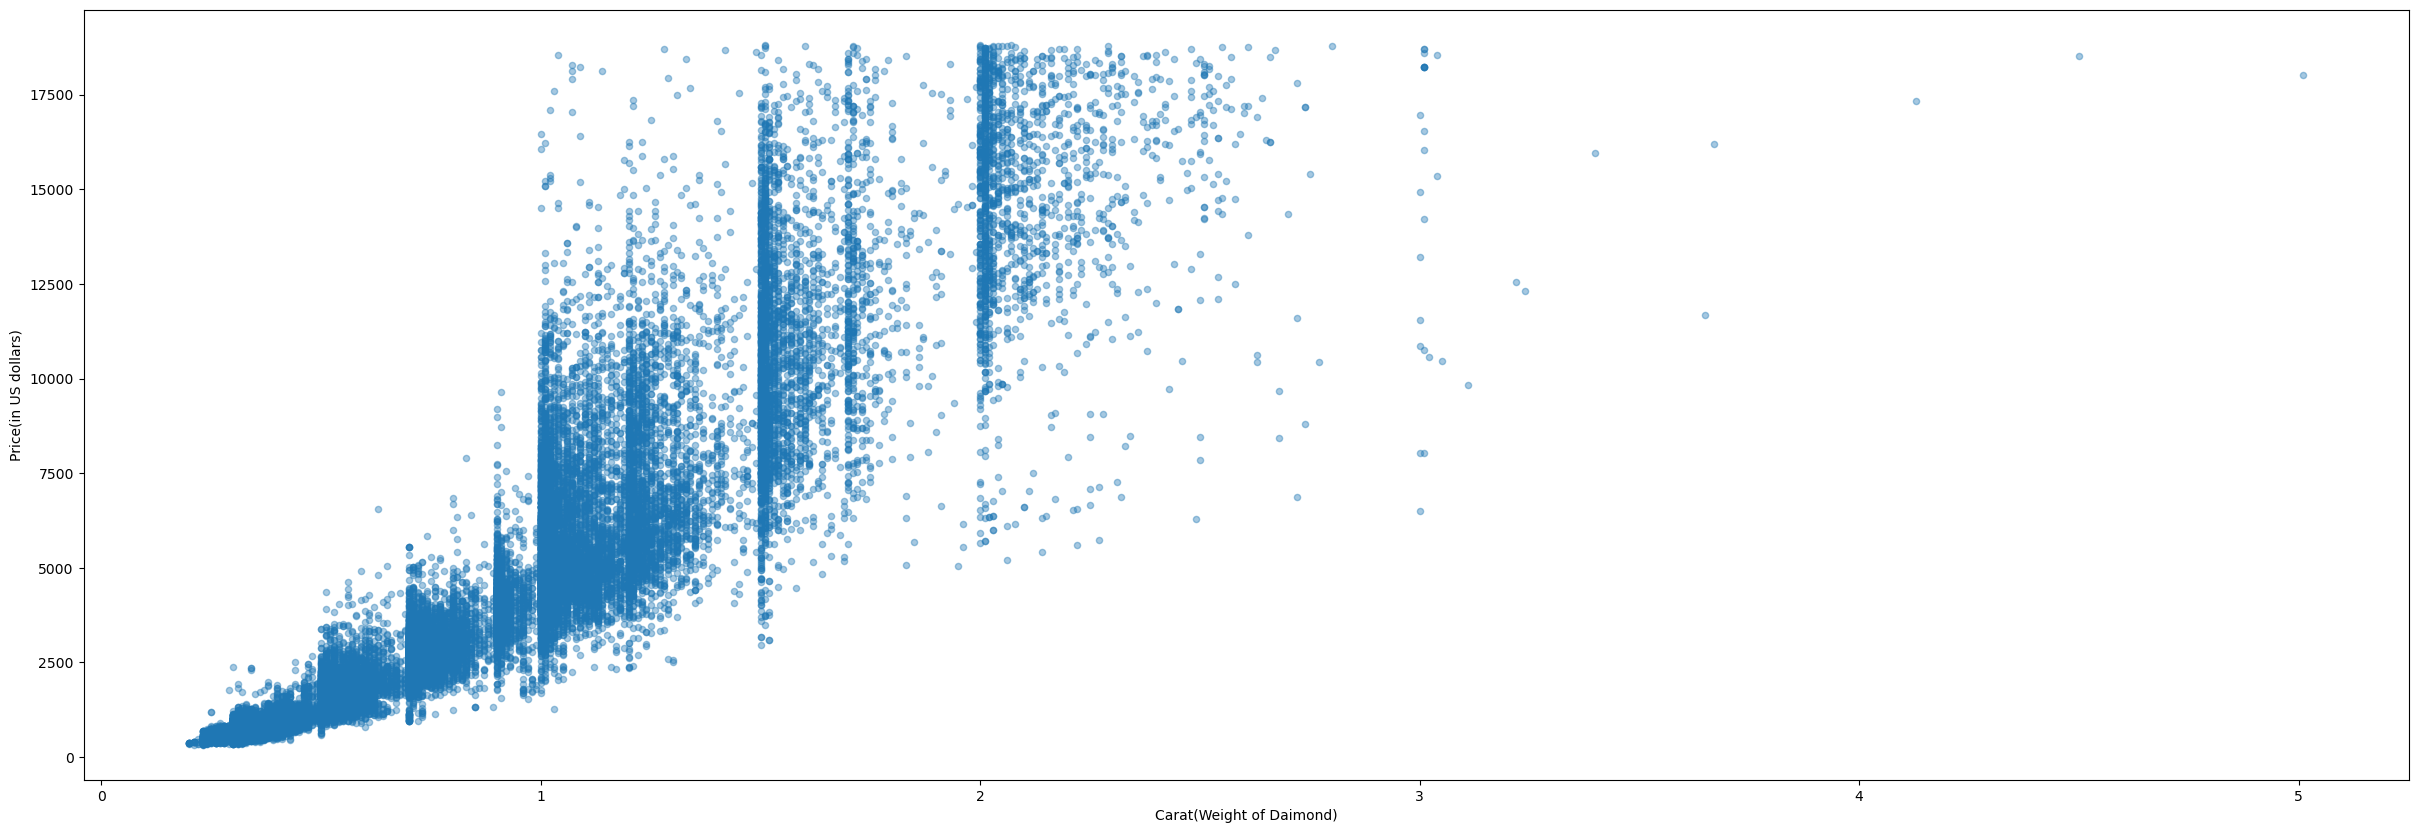

In [94]:
tr_data.plot(kind="scatter",x="Carat(Weight of Daimond)",y="Price(in US dollars)"
          ,figsize=(30,10),alpha=0.4)

In [95]:
tr_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43152 entries, 26546 to 15795
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Carat(Weight of Daimond)  43152 non-null  float64
 1   Depth                     43152 non-null  float64
 2   Table                     43152 non-null  float64
 3   Price(in US dollars)      43152 non-null  int64  
 4   X(length)                 43152 non-null  float64
 5   Y(width)                  43152 non-null  float64
 6   Z(Depth)                  43152 non-null  float64
 7   Cut(Quality)_Fair         43152 non-null  bool   
 8   Cut(Quality)_Good         43152 non-null  bool   
 9   Cut(Quality)_Ideal        43152 non-null  bool   
 10  Cut(Quality)_Premium      43152 non-null  bool   
 11  Cut(Quality)_Very Good    43152 non-null  bool   
 12  Color_D                   43152 non-null  bool   
 13  Color_E                   43152 non-null  bool   
 14  Color_F

In [96]:
#اضافه کردن ستون جدید
tr_data['Volume'] = tr_data['X(length)'] * tr_data['Y(width)'] * tr_data['Z(Depth)'] #حجم الماس
tr_data['Carat-to-Volume ratio'] = tr_data['Carat(Weight of Daimond)'] / tr_data['Volume'] #نسبت قیراط به ابعاد

tr_data.head()

,Carat(Weight of Daimond),Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth),Cut(Quality)_Fair,Cut(Quality)_Good,Cut(Quality)_Ideal,...,Clarity_I1,Clarity_IF,Clarity_SI1,Clarity_SI2,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Volume,Carat-to-Volume ratio
26546,2.01,58.1,64.0,16231,8.23,8.19,4.77,False,True,False,...,False,False,False,True,False,False,False,False,321.515649,0.006252
9159,1.01,60.0,60.0,4540,6.57,6.49,3.92,False,False,False,...,False,False,False,True,False,False,False,False,167.146056,0.006043
14131,1.10,62.5,58.0,5729,6.59,6.54,4.10,False,False,False,...,False,False,False,False,False,True,False,False,176.704260,0.006225
15757,1.50,61.5,65.0,6300,7.21,7.17,4.42,False,True,False,...,False,False,False,True,False,False,False,False,228.494994,0.006565
24632,1.52,62.1,57.0,12968,7.27,7.32,4.53,False,False,False,...,False,False,False,False,True,False,False,False,241.070292,0.006305


In [97]:
# شناسایی ستون‌های غیر عددی
non_numeric_cols = tr_data.select_dtypes(include=['object']).columns

# گزینه 1: تبدیل ستون‌های غیر عددی به عددی
tr_data = pd.get_dummies(tr_data, columns=non_numeric_cols)

# محاسبه ماتریس همبستگی
corr_matrix = tr_data.corr()
print(corr_matrix["Price(in US dollars)"].sort_values(ascending=False))

Price(in US dollars)        1.000000
Carat(Weight of Daimond)    0.921641
Volume                      0.897262
X(length)                   0.884243
Y(width)                    0.860110
Z(Depth)                    0.856940
Carat-to-Volume ratio       0.146093
Clarity_SI2                 0.127901
Table                       0.123076
Color_I                     0.096628
Cut(Quality)_Premium        0.092281
Color_J                     0.076843
Color_H                     0.063423
Cut(Quality)_Fair           0.020846
Clarity_SI1                 0.011902
Color_G                     0.008033
Cut(Quality)_Very Good      0.006441
Cut(Quality)_Good           0.002080
Clarity_I1                 -0.001502
Clarity_VS2                -0.002933
Depth                      -0.005583
Clarity_VS1                -0.011343
Color_F                    -0.023552
Clarity_IF                 -0.048371
Clarity_VVS2               -0.051788
Color_D                    -0.071679
Clarity_VVS1               -0.094627
C

In [98]:
#====================>Prepare the Data with PipeLine

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder



X_ix, Y_ix, Z_ix = 3, 4, 5
class CombinedAttributesAdder (BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        return self

    def transform (self, X, y = None):
        Volume = X[: , X_ix] * X[: , Y_ix] * X[: , Z_ix]

        return np.c_[X,  Volume]


class DataFrameSelector (BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y = None):
        return self

    def transform (self,X):
        return X[self.attribute_names].values
#======================================================================================================================================================
df=train_set.copy()
df_label=df["Price(in US dollars)"].copy()
df=df.drop("Price(in US dollars)", axis=1)

df_num = df.drop(["Cut(Quality)", "Color", "Clarity"], axis=1)
num_attrs = list(df_num)
cat_attrs = ['Cut(Quality)', 'Color', 'Clarity']

num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attrs)),
    ('impute', SimpleImputer(missing_values = np.nan , strategy = 'median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
    ])

cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attrs)),
    ('one_hot_encoder', OneHotEncoder(sparse_output=False)),
    ])

full_pipeline = FeatureUnion (transformer_list =[
                             ("num_pipeline", num_pipeline),
                             ("cat_pipeline", cat_pipeline),
                            ])

diamond_prepared = full_pipeline.fit_transform(df)
diamond_prepared_df = pd.DataFrame(diamond_prepared, columns =['Carat(Weight of Daimond)', 'Depth', 'Table','(length)', 'Y(width)'
                                   ,'Z(Depth)','Cut(Quality)_Fair','Cut(Quality)_Good','Cut(Quality)_Ideal','Cut(Quality)_Premium'
                                   ,'Cut(Quality)_Very Good','Color_D','Color_E','Color_F','Color_G','Color_H','Color_I'
                                   ,'Color_J','Clarity_I1','Clarity_IF','Clarity_SI1','Clarity_SI2','Clarity_VS1','Clarity_VS2'                                  
                                   ,'Clarity_VVS1','Clarity_VVS2','Carat-to-Volume ratio'])
                                   

diamond_prepared_df.head()

,Carat(Weight of Daimond),Depth,Table,(length),Y(width),Z(Depth),Cut(Quality)_Fair,Cut(Quality)_Good,Cut(Quality)_Ideal,Cut(Quality)_Premium,...,Color_J,Clarity_I1,Clarity_IF,Clarity_SI1,Clarity_SI2,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Carat-to-Volume ratio
0,2.560056,-2.550748,2.933861,2.229450,2.138209,1.738207,2.439003,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.447392,-1.220426,1.139575,0.747550,0.656710,0.537733,0.474064,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.637532,0.529996,0.242432,0.765404,0.700284,0.791951,0.595729,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.482597,-0.170173,3.382432,1.318885,1.249310,1.243894,1.254962,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.524851,0.249928,-0.206140,1.372448,1.380030,1.399249,1.415030,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [99]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(diamond_prepared_df, df_label)

sample_data_prepared = diamond_prepared_df.iloc[:4]
print("Predictions:\t", lin_reg.predict(sample_data_prepared))

sample_labels = df_label.iloc[:4]
print("Labels:\t\t",list(sample_labels))

Predictions:	 [14021.87172222  4676.18263744  6272.31286634  9001.3279456 ]
Labels:		 [16231, 4540, 5729, 6300]


In [100]:
from sklearn.metrics import mean_squared_error

diamond_perdiction = lin_reg.predict(diamond_prepared_df)
lin_mse = mean_squared_error(df_label,diamond_perdiction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1125.9151105332805

In [101]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg,diamond_prepared_df, df_label, scoring = "neg_mean_squared_error", cv = 10 )
lin_rsmse_scores = np.sqrt(-scores)

def display_scores (scores, model_name):
    print("===============", model_name,"===============")
    print("Scores:", scores)
    print("Mean:" , scores.mean())
    print("Standard deviation:", scores.std())
    print("====================================================================")

display_scores(lin_rsmse_scores,"Linear Regressoion")

=============== Linear Regressoion ===============
Scores: [1080.3914575  1112.20784334 1182.06578298 1120.07704417 1196.3245309
 1561.6893884  1117.55603019 1106.4834992  1108.96812072 1124.22680903]
Mean: 1170.999050643622
Standard deviation: 134.4306054912763


In [102]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(diamond_prepared_df, df_label)
diamond_perdiction = tree_reg.predict(diamond_prepared_df)
tree_mse = mean_squared_error(df_label,diamond_perdiction)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

9.067323921015339

In [103]:
tree_scores = cross_val_score(tree_reg,diamond_prepared_df, df_label, scoring = "neg_mean_squared_error", cv = 10 )
tree_rsmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rsmse_scores,"Decision Tree Regressoion" )

=============== Decision Tree Regressoion ===============
Scores: [713.94579166 734.79605845 786.05444923 720.67923321 755.27292186
 763.55183786 771.8638538  724.85338303 729.15556415 748.38325515]
Mean: 744.8556348401022
Standard deviation: 22.770578288021028


In [104]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(diamond_prepared_df, df_label)
forest_scores = cross_val_score(forest_reg,diamond_prepared_df, df_label, scoring = "neg_mean_squared_error", cv = 10 )
forest_rsmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rsmse_scores,"Random Forest Regressoion" )

=============== Random Forest Regressoion ===============
Scores: [539.00910142 508.63451702 618.68236953 567.78575317 571.95199669
 532.05070492 578.13219054 521.26658294 543.97397825 555.67850506]
Mean: 553.7165699533514
Standard deviation: 30.35956212166409


In [105]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [200,300,500] , 'max_features':['sqrt'], 'max_depth': [15, 20, 30]}]
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5 , scoring ='neg_mean_squared_error')
grid_search.fit(diamond_prepared_df, df_label)

print("Best Parameters: ", grid_search.best_params_)
print("Best Estimator: ", grid_search.best_estimator_)

Best Parameters:  {'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 500}
Best Estimator:  RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=500)


In [106]:
results = grid_search.cv_results_
for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print(np.sqrt(-mean_score), params)

621.5885430875572 {'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 200}
620.6956696998539 {'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 300}
621.6508933493061 {'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 500}
589.1120697792529 {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 200}
589.3514385737374 {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 300}
588.7228111807109 {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 500}
588.2393959073785 {'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 200}
588.0412181938068 {'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 300}
586.8589212736975 {'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 500}


In [107]:
final_model = grid_search.best_estimator_
X = test_set.drop("Price(in US dollars)", axis = 1)
y = test_set["Price(in US dollars)"].copy()
X_prepared = full_pipeline.transform(X)
#---------------------------------------------------------
X_prepared_df = pd.DataFrame(
    X_prepared,
    columns = ['Carat(Weight of Daimond)', 'Depth', 'Table','(length)', 'Y(width)'
                                   ,'Z(Depth)','Cut(Quality)_Fair','Cut(Quality)_Good','Cut(Quality)_Ideal','Cut(Quality)_Premium'
                                   ,'Cut(Quality)_Very Good','Color_D','Color_E','Color_F','Color_G','Color_H','Color_I'
                                   ,'Color_J','Clarity_I1','Clarity_IF','Clarity_SI1','Clarity_SI2','Clarity_VS1','Clarity_VS2'                                  
                                   ,'Clarity_VVS1','Clarity_VVS2','Carat-to-Volume ratio'])
#---------------------------------------------------------
final_prediction = final_model.predict(X_prepared_df)
final_mse = mean_squared_error(y,final_prediction)
final_rmse = np.sqrt(final_mse)
final_rmse

557.4159695689943

In [108]:
#The End... :)